<a href="https://colab.research.google.com/github/VijaySouri4/ComputerVisionNotebooks/blob/main/VGG_for_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! git clone https://github.com/mdhmz1/Auto-Annotate

Cloning into 'Auto-Annotate'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 69 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [ ]:
%cd Auto-Annotate/
!pip3 install -r requirements.txt

/content/Auto-Annotate
     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 276 kB 59.2 MB/s 
     |████████████████████████████████| 503 kB 48.2 MB/s 
     |████████████████████████████████| 50 kB 5.2 MB/s 
     |████████████████████████████████| 3.8 MB 46.7 MB/s 
     |████████████████████████████████| 199 kB 50.5 MB/s 
     |████████████████████████████████| 154 kB 65.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=f87f5ce075a62e677ec28e9cf435ec8415f7aa6b1657d0d5fc6ee73182bfefa5
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
  

In [ ]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [ ]:
!unzip "/content/drive/MyDrive/Category and Attribute Prediction Benchmark/Img/img.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000009.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000010.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000011.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000012.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000013.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000014.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000015.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000016.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000017.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000018.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000019.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000020.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000021.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000022.jpg  
  inflating: img/Eyelash_Lace_Maxi_Cardigan/img_00000023.jpg  
  in

In [ ]:
#Default dimensions we found online
img_width, img_height = 224, 224 
 
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5'
# loading up our datasets
train_data_dir = '/content/drive/MyDrive/clothing-labeled/clothing-dataset-small/train'
validation_data_dir = '/content/drive/MyDrive/clothing-labeled/clothing-dataset-small/validation' 
test_data_dir = '/content/drive/MyDrive/clothing-labeled/clothing-dataset-small/test'
 
# number of epochs to train top model 
epochs = 7 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 50 

In [ ]:
import tensorflow as tf

tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


343392256/553467096 [=================>............] - ETA: 1s

KeyboardInterrupt: ignored

In [ ]:
#Loading vgc16 model
vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save('bottleneck_features_train_redo .npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 3068 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:02:44.727586


In [ ]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_test_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_test = int(math.ceil(nb_test_samples / batch_size)) 
 
bottleneck_features_test = vgg16.predict_generator(generator, predict_size_test) 
 
np.save('bottleneck_features_test.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 372 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:03:07.873157


In [ ]:
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_validation_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation) 
 
np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 341 images belonging to 10 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time:  0:02:51.278310


In [ ]:
#training data
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 


 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
train_data = np.load('bottleneck_features_train_redo.npy') 
 
# get the class labels for the training data, in the original order 
train_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 3068 images belonging to 10 classes.


In [ ]:
#testing data
generator_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load('bottleneck_features_test.npy') 
 
# get the class labels for the training data, in the original order 
test_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 372 images belonging to 10 classes.


In [ ]:
len(train_labels)

3068

In [ ]:
len(train_data)

3068

In [ ]:
#validation data
generator_top = datagen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_validation_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
validation_data = np.load('bottleneck_features_validation.npy') 
 
# get the class labels for the training data, in the original order 
validation_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 341 images belonging to 10 classes.


In [ ]:
len(validation_data)

341

In [ ]:
validation_data.shape

(341, 7, 7, 512)

In [ ]:
validation_labels.shape

(341, 10)

In [ ]:
len(validation_labels)

341

In [ ]:
start = datetime.datetime.now()
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
   optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])
history = model.fit(train_data, train_labels, 
   epochs=7,
   batch_size=batch_size, 
   validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_data, validation_labels, batch_size=batch_size,     verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/7
62/62 [==============================] - 2s 13ms/step - loss: 1.5764 - acc: 0.4935 - val_loss: 1.0895 - val_acc: 0.6833
Epoch 2/7
62/62 [==============================] - 1s 9ms/step - loss: 1.0061 - acc: 0.6822 - val_loss: 0.8039 - val_acc: 0.7507
Epoch 3/7
62/62 [==============================] - 1s 9ms/step - loss: 0.8083 - acc: 0.7396 - val_loss: 0.6754 - val_acc: 0.7683
Epoch 4/7
62/62 [==============================] - 1s 9ms/step - loss: 0.6806 - acc: 0.7816 - val_loss: 0.5847 - val_acc: 0.8299
Epoch 5/7
62/62 [==============================] - 1s 8ms/step - loss: 0.5630 - acc: 0.8178 - val_loss: 0.5650 - val_acc: 0.8211
Epoch 6/7
62/62 [==============================] - 1s 9ms/step - loss: 0.5055 - acc: 0.8240 - val_loss: 0.5003 - val_acc: 0.8534
Epoch 7/7
7/7 [==============================] - 0s 7ms/step - loss: 0.5043 - acc: 0.8387
[INFO] accuracy: 83.87%
[INFO] Loss: 0.5043052434921265
Time:  0:00:06.082419


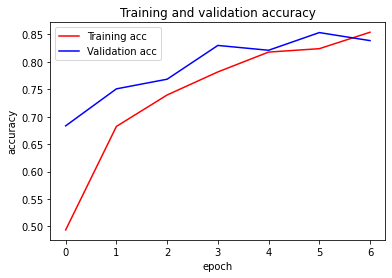

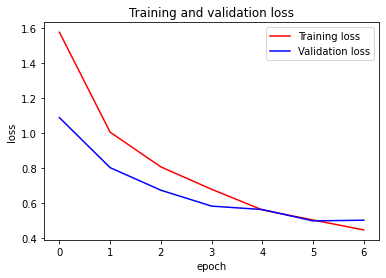

In [ ]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
def read_image(file_path):
   print("[INFO] loading and preprocessing image…") 
   image = load_img(file_path, target_size=(224, 224)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image


image = read_image('/content/drive/MyDrive/demo.jpeg')
bt_prediction = vgg16.predict(image) 
preds = model.predict(bt_prediction)

[INFO] loading and preprocessing image…


In [ ]:
preds

array([[0.02090787, 0.00434609, 0.02734803, 0.21601185, 0.06040952,
        0.02516123, 0.62642074, 0.01414884, 0.00408099, 0.00116488]],
      dtype=float32)

In [ ]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 '''prints pretty confusion metric with normalization option '''
if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
 
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label') 

ValueError: ignored

In [ ]:
def test_single_image(path):
  clothes = ['formal', 'informal']
  images = read_image(path)
  time.sleep(.5)
  bt_prediction = vgg16.predict(images) 
  preds = model.predict_proba(bt_prediction)
  for idx, animal, x in zip(range(0,6), animals , preds[0]):
   print(“ID: {}, Label: {} {}%”.format(idx, animal, round(x*100,2) ))
  print(‘Final Decision:’)
  time.sleep(.5)
  for x in range(3):
   print(‘.’*(x+1))
   time.sleep(.2)
  class_predicted = model.predict_classes(bt_prediction)
  class_dictionary = generator_top.class_indices 
  inv_map = {v: k for k, v in class_dictionary.items()} 
  print(“ID: {}, Label: {}”.format(class_predicted[0],  inv_map[class_predicted[0]])) 
  return load_img(path)

In [ ]:
def read_image(file_path):
   print(“[INFO] loading and preprocessing image…”) 
   image = load_img(file_path, target_size=(224, 224)) 
   image = img_to_array(image) 
   image = np.expand_dims(image, axis=0)
   image /= 255. 
   return image
def test_single_image(path):
  animals = [‘butterflies’, ‘chickens’, ‘elephants’, ‘horses’, ‘spiders’, ‘squirells’]
  images = read_image(path)
  time.sleep(.5)
  bt_prediction = vgg16.predict(images) 
  preds = model.predict_proba(bt_prediction)
  for idx, animal, x in zip(range(0,6), animals , preds[0]):
   print(“ID: {}, Label: {} {}%”.format(idx, animal, round(x*100,2) ))
  print(‘Final Decision:’)
  time.sleep(.5)
  for x in range(3):
   print(‘.’*(x+1))
   time.sleep(.2)
  class_predicted = model.predict_classes(bt_prediction)
  class_dictionary = generator_top.class_indices 
  inv_map = {v: k for k, v in class_dictionary.items()} 
  print(“ID: {}, Label: {}”.format(class_predicted[0],  inv_map[class_predicted[0]])) 
  return load_img(path)
path = ‘data/test/yourpicturename’
test_single_image(path)